In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.grid import Boxes
from src.read_data import read_data
import dytop.Grid as Grid
import dytop.CMGDB_util as CMGDB_util
import CMGDB

In [2]:
# smooth data
# init_data = read_data('vp_ic11all.dat')
# next_data = read_data('vp_next11all.dat')

# non-smooth data
init_data = read_data('vel_phase_ic.dat')
next_data = read_data('vel_phase_next.dat')

X = init_data[:, [0, 1]]
Y = next_data[:, [0, 1]]
init_impact_velocity = init_data[:, 0]
init_impact_phase = init_data[:, 1]
next_impact_velocity = next_data[:, 0]
next_impact_phase = next_data[:, 1]

In [3]:
plot_data = True

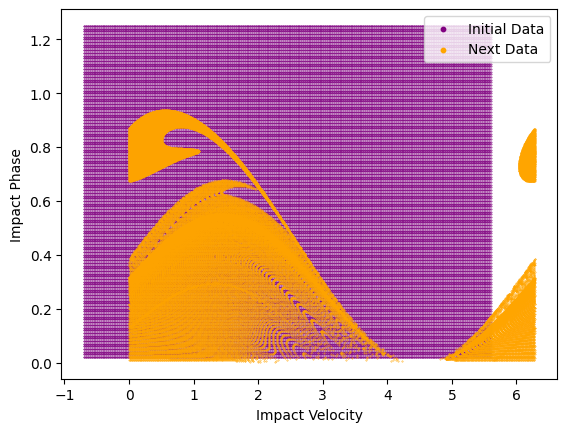

In [4]:
if plot_data: 
    plt.scatter(X[:,0], X[:,1], c='purple', s = 0.1, label='Initial Data')
    plt.scatter(Y[:,0], Y[:,1], c='orange', s = 0.1, label='Next Data')
    plt.xlabel('Impact Velocity')
    plt.ylabel('Impact Phase')
    plt.legend(markerscale=10)
    plt.savefig('vp_non_smooth.png')

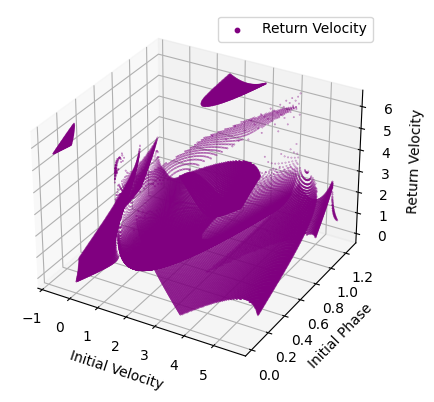

In [5]:
if plot_data:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Initial Velocity')
    ax.set_ylabel('Initial Phase')
    ax.set_zlabel('Return Velocity')
    ax.scatter(X[:,0], X[:,1], next_impact_velocity, c='purple', s=0.1, label='Return Velocity')
    plt.legend(markerscale=10)

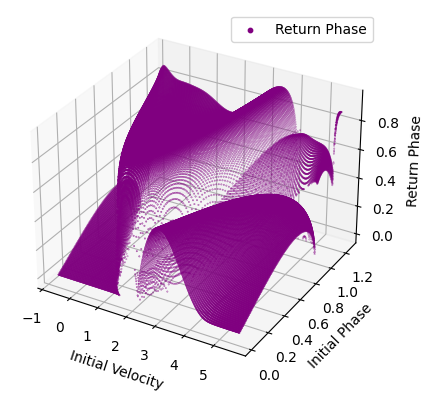

In [6]:
if plot_data:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], next_impact_phase, c='purple', s=0.1, label='Return Phase')
    ax.set_xlabel('Initial Velocity')
    ax.set_ylabel('Initial Phase')
    ax.set_zlabel('Return Phase')
    plt.legend(markerscale=10)

In [7]:
lower_bounds_init = [np.min(init_impact_velocity), np.min(init_impact_phase)]
upper_bounds_init = [np.max(init_impact_velocity), np.max(init_impact_phase)]
print('Lower init bounds: ', lower_bounds_init)
print('Upper init bounds ', upper_bounds_init)

lower_next_bounds = [np.min(next_impact_velocity), np.min(next_impact_phase)]
upper_next_bounds = [np.max(next_impact_velocity), np.max(next_impact_phase)]
print('Lower next bounds ', lower_next_bounds)
print('Upper next bounds ', upper_next_bounds)

lower_bounds = [min(lower_bounds_init[0], lower_next_bounds[0]) - 0.1, min(lower_bounds_init[1], lower_next_bounds[1]) - 0.1]
upper_bounds = [max(upper_bounds_init[0], upper_next_bounds[0]), max(upper_bounds_init[1], upper_next_bounds[1])]
print('Lower bounds:', lower_bounds)
print('Upper bounds:', upper_bounds)

Lower init bounds:  [-0.7, 0.02]
Upper init bounds  [5.6, 1.25]
Lower next bounds  [1.5055208e-05, 0.0021632312]
Upper next bounds  [6.2831837, 0.93722771]
Lower bounds: [-0.7999999999999999, -0.0978367688]
Upper bounds: [6.2831837, 1.25]


### Linkage hierarchical clustering to identify potential discontinuities
Here we apply hierarchical linkage clustering and plot the height of the final cluster merge.

Valid clustering methods are: single, complete, average, weighted, centroid, median, and ward. 

Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

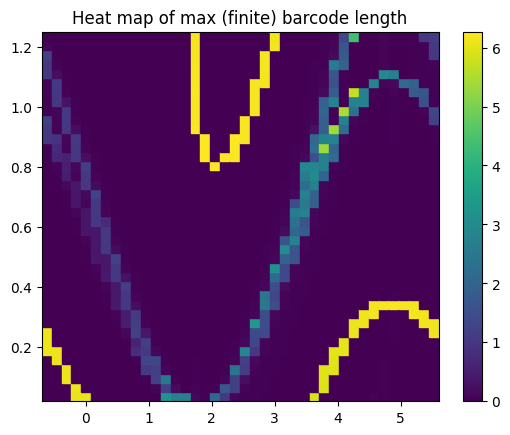

In [8]:
boxes = Boxes(lower_bounds_init, upper_bounds_init, 40)
boxes.plot(init_data, next_data, method='persistence')

In [ ]:
boxes = Boxes(lower_bounds_init, upper_bounds_init, 40)
boxes.plot(init_data, next_data, method='ward')

### Conley-Morse graph

Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 8192
Compute_Morse_Graph. B phase_space -> size () == 8192
Total Grid Memory (can be external) = 622814
Max Memory For Single Grid (must be internal)= 622814
Max SCC Random Access memory use (must be internal)= 69632
Max SCC stack memory use (can be external memory) = 136776
 ---- SUMMARY ---- 
Internal Memory Requirement = 692446
External Memory Requirement = 759590
Max graph memory size (never stored, however) = 3768016
ConleyIndex: calling RelativeMapHomology.
ConleyIndex: calling RelativeMapHomology.
ConleyIndex: calling RelativeMapHomology.
ConleyIndex: calling RelativeMapHomology.
ConleyIndex: calling RelativeMapHomology.
Dimension 0:
 Matrix is 1 x 1
[ 1 ]
ConleyIndex: calling RelativeMapHomology.
Dimension 1:
 Matrix is 8 x 8
[ 0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  

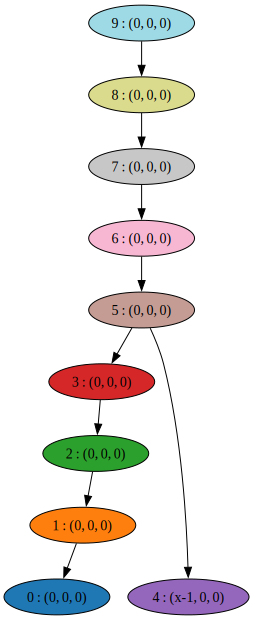

In [9]:
data = np.concatenate((X,Y),axis=1)

subdiv_limit = 10000

k = 0.5

sb = 13

grid = Grid.Grid(lower_bounds, upper_bounds, sb)

id2image = grid.id2image(data)

# Define box map for f
MG_util = CMGDB_util.CMGDB_util()
K=[k, k]
def F(rect):
    return MG_util.F_data(rect, id2image, grid.point2cell, K)

subdiv_init = sb
subdiv_min = sb
subdiv_max = sb
model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, F)

morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

CMGDB.PlotMorseGraph(morse_graph)

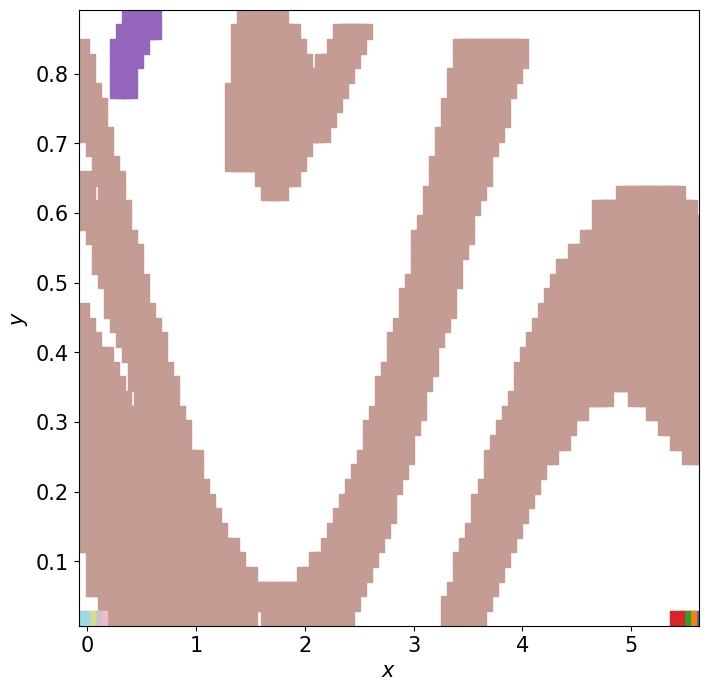

In [10]:
CMGDB.PlotMorseSets(morse_graph)